In [ ]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)


2113536/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
len(train_data)
len(test_data)

In [ ]:
train_data[10]

Декодирование новостей обратно в текст

In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key)for (key, value) in word_index.items()])
decoded_newswire = ''.join([reverse_word_index.get(i-3,'?') for i in 
                            train_data[0]])
decoded_newswire

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels) 


In [ ]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train= one_hot_train_labels[1000:]


In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
16/16 [==============================] - 2s 53ms/step - loss: 3.1427 - accuracy: 0.4393 - val_loss: 1.7656 - val_accuracy: 0.6290
Epoch 2/20
16/16 [==============================] - 1s 38ms/step - loss: 1.5642 - accuracy: 0.6912 - val_loss: 1.2988 - val_accuracy: 0.7100
Epoch 3/20
16/16 [==============================] - 1s 39ms/step - loss: 1.1261 - accuracy: 0.7621 - val_loss: 1.1174 - val_accuracy: 0.7580
Epoch 4/20
16/16 [==============================] - 1s 39ms/step - loss: 0.8723 - accuracy: 0.8182 - val_loss: 1.0254 - val_accuracy: 0.7830
Epoch 5/20
16/16 [==============================] - 1s 38ms/step - loss: 0.7023 - accuracy: 0.8498 - val_loss: 0.9614 - val_accuracy: 0.8010
Epoch 6/20
16/16 [==============================] - 1s 38ms/step - loss: 0.5636 - accuracy: 0.8829 - val_loss: 0.9194 - val_accuracy: 0.8110
Epoch 7/20
16/16 [==============================] - 1s 37ms/step - loss: 0.4642 - accuracy: 0.9102 - val_loss: 0.8886 - val_accuracy: 0.8170
Epoch 8/20
16

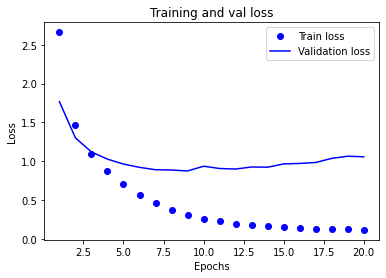

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Train loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

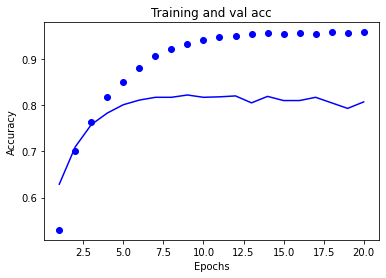

In [ ]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Val acc')
plt.title('Training and val acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend

plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)
results

Epoch 1/9
250/250 [==============================] - 3s 9ms/step - loss: 2.0133 - accuracy: 0.5928 - val_loss: 1.0885 - val_accuracy: 0.7620
Epoch 2/9
250/250 [==============================] - 2s 8ms/step - loss: 0.7828 - accuracy: 0.8303 - val_loss: 0.9097 - val_accuracy: 0.8050
Epoch 3/9
250/250 [==============================] - 2s 8ms/step - loss: 0.4690 - accuracy: 0.9002 - val_loss: 0.8811 - val_accuracy: 0.8110
Epoch 4/9
250/250 [==============================] - 2s 8ms/step - loss: 0.3058 - accuracy: 0.9324 - val_loss: 0.9362 - val_accuracy: 0.8120
Epoch 5/9
250/250 [==============================] - 2s 8ms/step - loss: 0.2447 - accuracy: 0.9436 - val_loss: 0.9767 - val_accuracy: 0.8210
Epoch 6/9
250/250 [==============================] - 2s 8ms/step - loss: 0.1845 - accuracy: 0.9542 - val_loss: 1.1305 - val_accuracy: 0.8020
Epoch 7/9
250/250 [==============================] - 2s 8ms/step - loss: 0.1676 - accuracy: 0.9575 - val_loss: 1.0835 - val_accuracy: 0.8100
Epoch 8/9
250

[1.5768121480941772, 0.7769367694854736]